# NEU502b fMRI Respiration Blocks

In [1]:
import os, warnings
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
from scripts.utilities import read_gifti
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define metadata.
func_dir = 'preproc/fmriprep'
subjects = ['sub-01','sub-02']
tasks = ['breathholdcontrol', 'hyperventilatecontrol']
spaces = ['fsaverage5.L','fsaverage5.R']

/home/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Step 1: Extract Timecourses

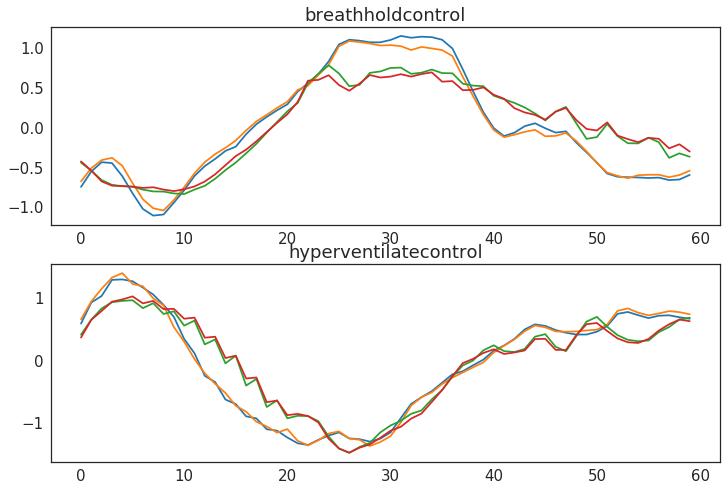

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(2,1,figsize=(12,8))

for ax, task in zip(axes, tasks):
    
    ## Prepare save-directory.
    out_dir = os.path.join('first_levels', task)
    if not os.path.isdir(out_dir): os.makedirs(out_dir)
    
    for subj in subjects:

        for space in spaces:
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load and prepare data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load task data.
            f = os.path.join('first_levels',task,'%s_task-%s_space-%s.psc.npz' %(subj,task,space))
            npz = np.load(f)

            ## Prepare data.
            data, mask = npz['psc'], npz['mask']
            Y = data[:,mask]
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Realign data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ## Average over vertices.
            Y_avg = Y.mean(axis=-1)
            
            ## Define onset times.
            onsets = np.arange(10,370,60)
            
            ## Realign data to start of instructions.
            tc = []
            for i in np.arange(onsets.size-1):
                tc.append( Y_avg[onsets[i]:onsets[i+1]] )
            tc = np.array(tc).mean(axis=0)
            
            ax.plot(tc)
            
    ax.set(title=task)